In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from scipy import stats
import pandas as pd


In [6]:
file='spectra.csv'
data = ascii.read(file,format='csv')
file1='grizps11aop.csv'
data1 = ascii.read(file1,format='csv')

#first epoch spectra of PS1-11aop
l = data['waves1']
flux = data['flux_corr1']
fluxerr = data['fluxerror']

#second epoch spectra of PS1-11aop
lg = data['waves2']
fluxg = data['flux_corr2']

#host galaxy spectra
lga = data['wavesg']
fluxga = data['flux_corrg']

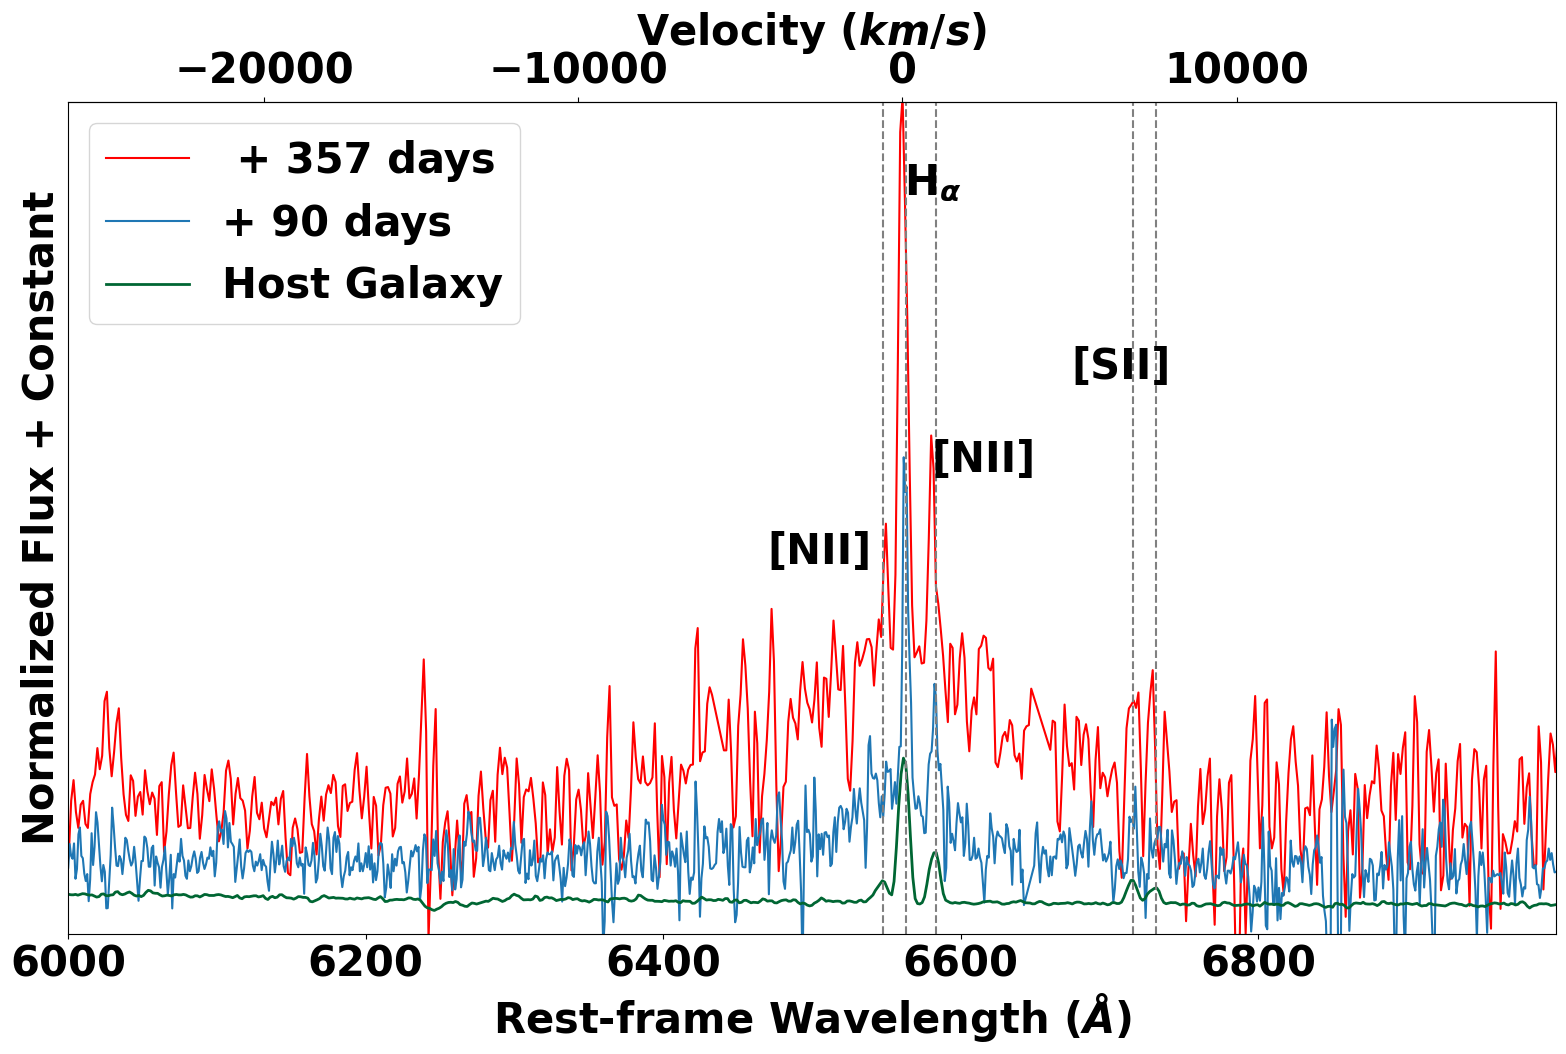

In [7]:
def norm(data):
    return (data)/(max(data)-min(data))
from matplotlib import rc,rcParams
rc('font', weight='bold')
fig,ax = plt.subplots(figsize=(19.20,10.80))
#fig, ax = plt.subplots()

indices_to_exclude2 = [1172,1173,1174,1175,2452,2453,2454,2455,2456,2457,2458]
mask2 = np.ones(len(lg), dtype=bool)
mask2[indices_to_exclude2] = False
ax.plot(lg[mask2],norm(fluxg)[mask2],color = 'red', label = ' + 357 days')

indices_to_exclude1 = [2165,2166,2167,2168,2169,2170,1562,1563,1564,1565,1566,1567,1568,1820,1821,1822,1823,1824,1825,1826,3660,3661,3662,3663,3664,3665]
mask1 = np.ones(len(l), dtype=bool)
mask1[indices_to_exclude1] = False
ax.plot(l[mask1],norm(flux*1e15)[mask1], label = '+ 90 days')

ax.plot(lga,fluxga,color = '#006633',linewidth = 2, label = 'Host Galaxy')
ax.tick_params(labelsize=30)
plt.ylabel(r'Normalized Flux + Constant',fontsize=30,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=30,fontweight='bold')
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
plt.legend(loc ='upper left', fontsize =30)
ax.set_xlim(3500,7000)
ax.axvline(x=6562.852, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6562,0.8, r'H$_\alpha$', fontsize=30)
#zoom in
ax.axvline(x=6548,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6470,0.4, r'[NII]', fontsize=30)
ax.axvline(x=6583,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6580,0.5, r'[NII]', fontsize=30)
ax.axvline(x=6716,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6674,0.6, r'[SII]', fontsize=30)
ax.axvline(x=6731,linestyle = '--', ymin=0, ymax=1, color = 'gray')

ax.set_ylim(0,0.9)
ax.xaxis.set_ticks(np.arange(6000,7000,200))
ax.set_xlim(6000,7000)
ax.axes.get_yaxis().set_ticks([])

def wave2vel(x):
    c = 3e10 #cm/s
    wave0= 6384 #6564.91 #6384 in Amstrong
    return ((c*(wave0-x))/x)/1e5  #x= wave

def vel2wave(x):
    c = 3e10 #cm/s
    wave0= 6384 #6564.91 
    return (wave0)/np.sqrt((c-(x*1e5))/(c+(x*1e5))) #x=vel

secax = ax.secondary_xaxis('top', functions=(wave2vel, vel2wave))
secax.set_xlabel(r'Velocity ($km/s$)', fontsize =30,fontweight ='bold')
secax.tick_params(labelsize=30)

plt.savefig('spectrum-zoom.png', dpi = 300, transparent = True)

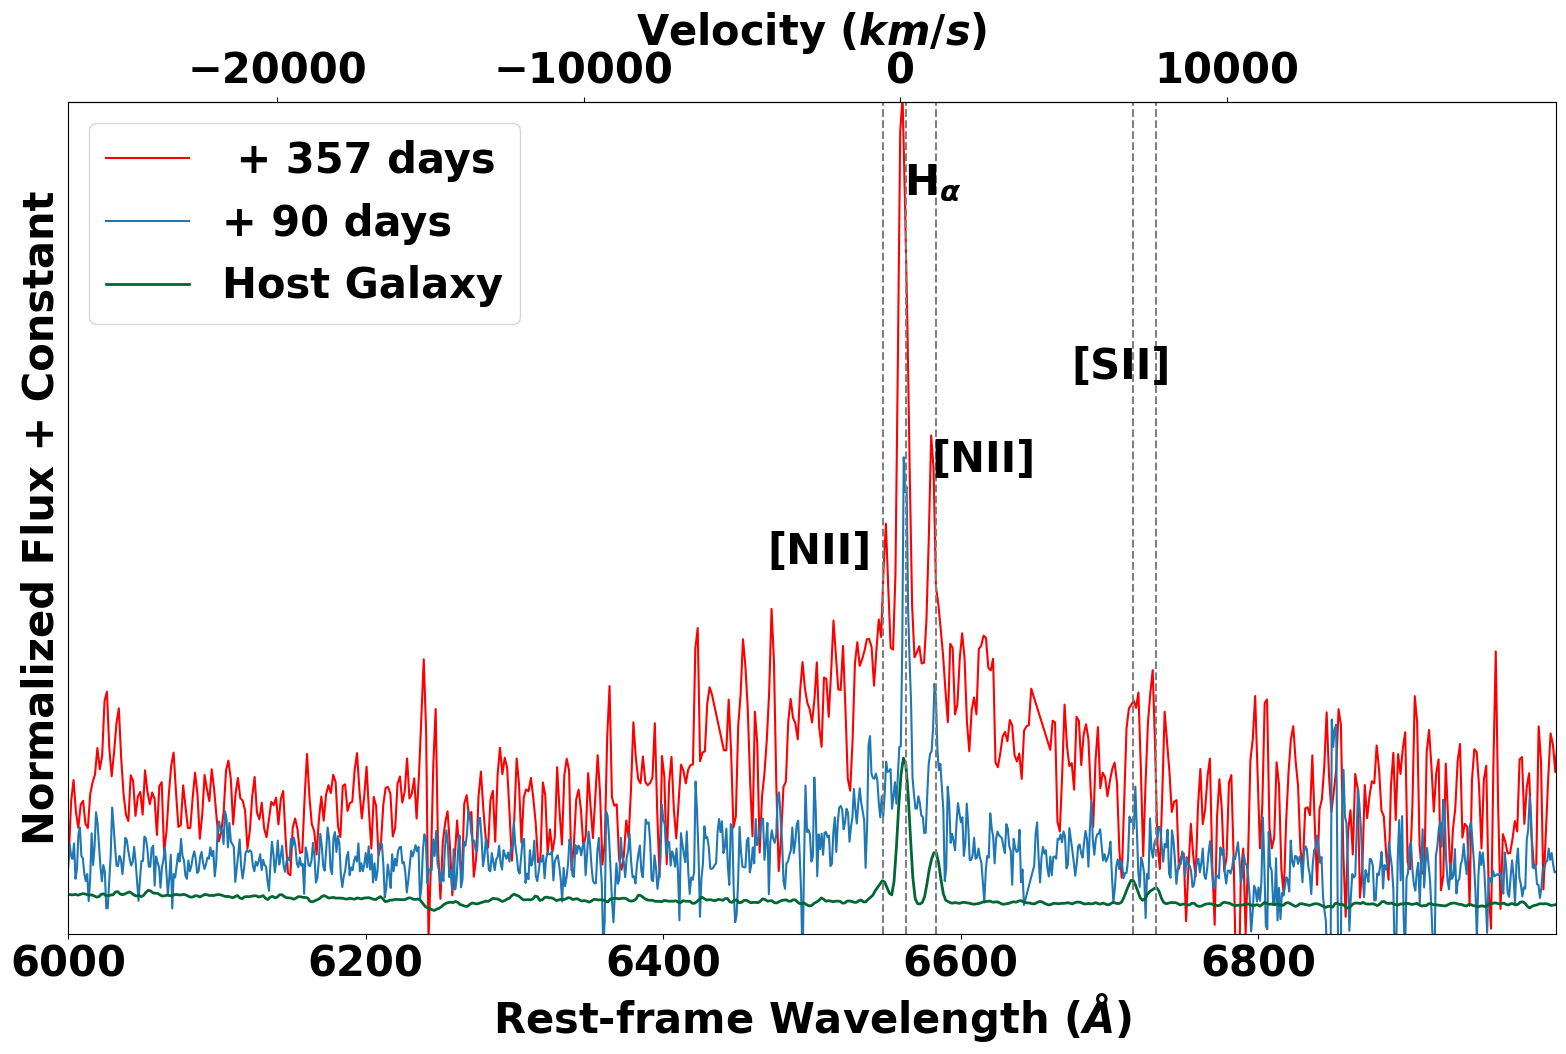

In [19]:
def norm(data):
    return (data)/(max(data)-min(data))
from matplotlib import rc,rcParams
rc('font', weight='bold')
fig,ax = plt.subplots(figsize=(19.20,10.80))
#fig, ax = plt.subplots()

indices_to_exclude2 = [1172,1173,1174,1175,2452,2453,2454,2455,2456,2457,2458]
mask2 = np.ones(len(lg), dtype=bool)
mask2[indices_to_exclude2] = False
ax.plot(lg[mask2],norm(fluxg)[mask2],color = 'red', label = ' + 357 days')

indices_to_exclude1 = [2165,2166,2167,2168,2169,2170,1562,1563,1564,1565,1566,1567,1568,1820,1821,1822,1823,1824,1825,1826,3660,3661,3662,3663,3664,3665]
mask1 = np.ones(len(l), dtype=bool)
mask1[indices_to_exclude1] = False
ax.plot(l[mask1],norm(flux*1e15)[mask1], label = '+ 90 days')

ax.plot(lga,fluxga,color = '#006633',linewidth = 2, label = 'Host Galaxy')
ax.tick_params(labelsize=30)
plt.ylabel(r'Normalized Flux + Constant',fontsize=30,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=30,fontweight='bold')
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
plt.legend(loc ='upper left', fontsize =30)
ax.set_xlim(3500,7000)
ax.axvline(x=6562.852, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6562,0.8, r'H$_\alpha$', fontsize=30)
#zoom in
ax.axvline(x=6548,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6470,0.4, r'[NII]', fontsize=30)
ax.axvline(x=6583,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6580,0.5, r'[NII]', fontsize=30)
ax.axvline(x=6716,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6674,0.6, r'[SII]', fontsize=30)
ax.axvline(x=6731,linestyle = '--', ymin=0, ymax=1, color = 'gray')

ax.set_ylim(0,0.9)
ax.xaxis.set_ticks(np.arange(6000,7000,200))
ax.set_xlim(6000,7000)
ax.axes.get_yaxis().set_ticks([])

def wave2vel(x):
    c = 3e10 #cm/s
    wave0= 6422 #6564.91 #6384 in Amstrong
    return ((c*(wave0-x))/wave0)/1e5  #x= wave

def vel2wave(x):
    c = 3e10 #cm/s
    wave0= 6422 #6564.91 
    return (wave0)/np.sqrt((c-(x*1e5))/(c+(x*1e5))) #x=vel


secax = ax.secondary_xaxis('top', functions=(wave2vel, vel2wave))
secax.set_xlabel(r'Velocity ($km/s$)', fontsize =30,fontweight ='bold')
secax.tick_params(labelsize=30)

#plt.savefig('spectrum-zoom.png', dpi = 300, transparent = True)

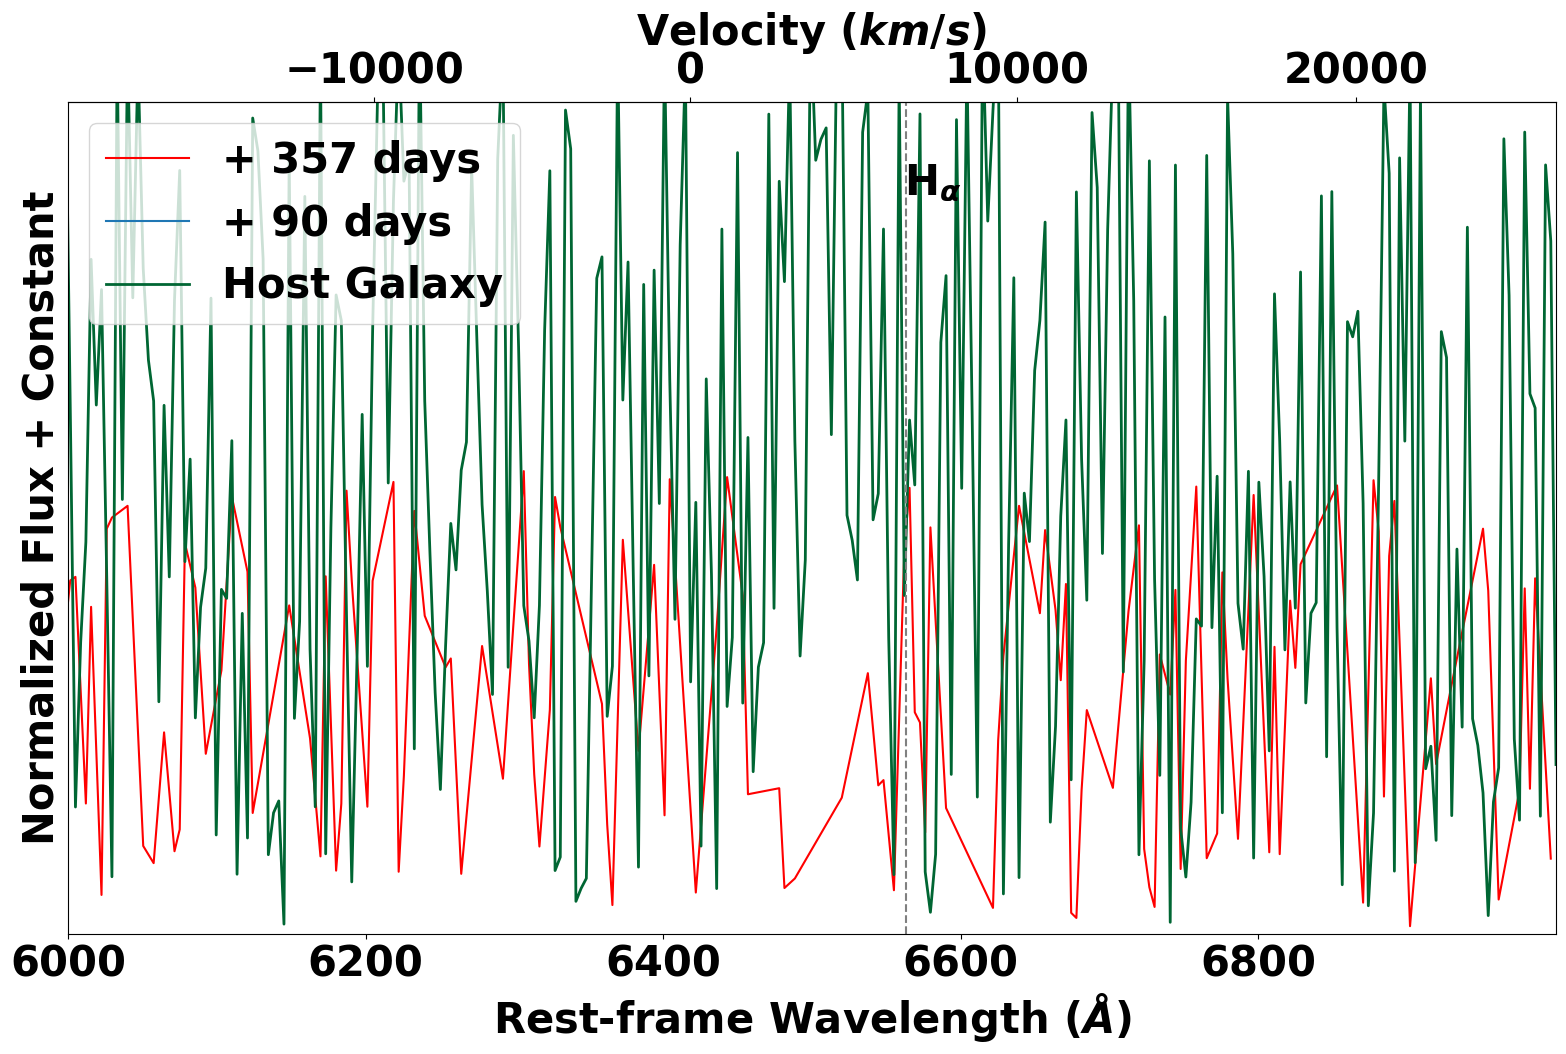

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def norm(data):
    return (data)/(max(data)-min(data))

def wave2vel(x):
    c = 3e10 # cm/s
    wave0 = 6562.852 # H-alpha wavelength in Angstroms
    return ((c*(wave0-x))/wave0)/1e5  # Convert wavelength to velocity (km/s)

def vel2wave(x):
    c = 3e10 # cm/s
    wave0 = 6562.852 # H-alpha wavelength in Angstroms
    return (wave0)/np.sqrt((c-(x*1e5))/(c+(x*1e5))) # Convert velocity to wavelength (Angstroms)

# Define your data and masking
lg = np.linspace(3500, 7000, 1000)
fluxg = np.random.rand(1000)
l = np.linspace(3500, 7000, 1000)
flux = np.random.rand(1000)
lga = np.linspace(3500, 7000, 1000)
fluxga = np.random.rand(1000)
mask1 = flux * 1e15 < 0.5
mask2 = fluxg < 0.5

# Plotting
fig, ax = plt.subplots(figsize=(19.20, 10.80))

ax.plot(lg[mask2], norm(fluxg)[mask2], color='red', label='+ 357 days')
ax.plot(l[mask1], norm(flux*1e15)[mask1], label='+ 90 days')
ax.plot(lga, fluxga, color='#006633', linewidth=2, label='Host Galaxy')

ax.tick_params(labelsize=30)
plt.ylabel(r'Normalized Flux + Constant', fontsize=30, fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)', fontsize=30, fontweight='bold')
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
plt.legend(loc='upper left', fontsize=30)
ax.set_xlim(3500, 7000)
ax.axvline(x=6562.852, linestyle='--', ymin=0, ymax=1, color='gray')
ax.text(6562, 0.8, r'H$_\alpha$', fontsize=30)
ax.set_ylim(0, 0.9)
ax.xaxis.set_ticks(np.arange(6000, 7000, 200))
ax.set_xlim(6000, 7000)
ax.axes.get_yaxis().set_ticks([])

# Secondary axis for velocity
secax = ax.secondary_xaxis('top', functions=(wave2vel, vel2wave))
secax.set_xlabel(r'Velocity ($km/s$)', fontsize=30, fontweight='bold')
secax.tick_params(labelsize=30)

plt.show()
